In [22]:
import matplotlib.pyplot as plt
import matplotlib.collections as mc
import numpy as np

In [145]:
N = 10
X = np.random.normal(0, 1, N)
Y = np.random.normal(0, 1, N)

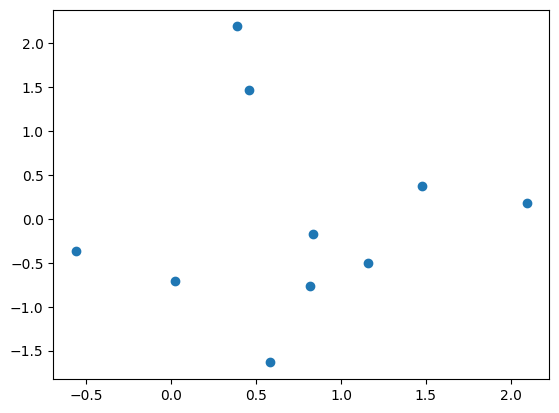

In [146]:
plt.scatter(X, Y)
plt.show()

Функция `BuildGreedyNetwork` строит фундаментальный жадный граф на множестве точек $V=\{(x_i, y_i)\}$, используя множество $U=\{(x_{\textrm{train}}, y_{\textrm{train}})\}$ в качестве тренировочной выборки.

Здесь:
- `G_MSNET` предполагает, что $U = V$;
- `G_RDPTS` использует для обучения $M$ точек из того же распределения.

In [148]:
def BuildGreedyNetwork(X, Y, X_train, Y_train):
    n, m = len(X), len(X_train)
    G = [[] for _ in range(n)]
    for i in range(m):
        x, y = X_train[i], Y_train[i]
        D = (X - x) ** 2 + (Y - y) ** 2
        
        min_pos = 0
        for j in range(1, n):
            if D[j] < D[min_pos]:
                G[min_pos].append(j)
                min_pos = j
    for i in range(n):
        G[i] = sorted(list(set(G[i])))
    return G

G_MSNET = BuildGreedyNetwork(X, Y, X, Y)
M = 10**4
G_RDPTS = BuildGreedyNetwork(X, Y, np.random.normal(0, 1, M), np.random.normal(0, 1, M))

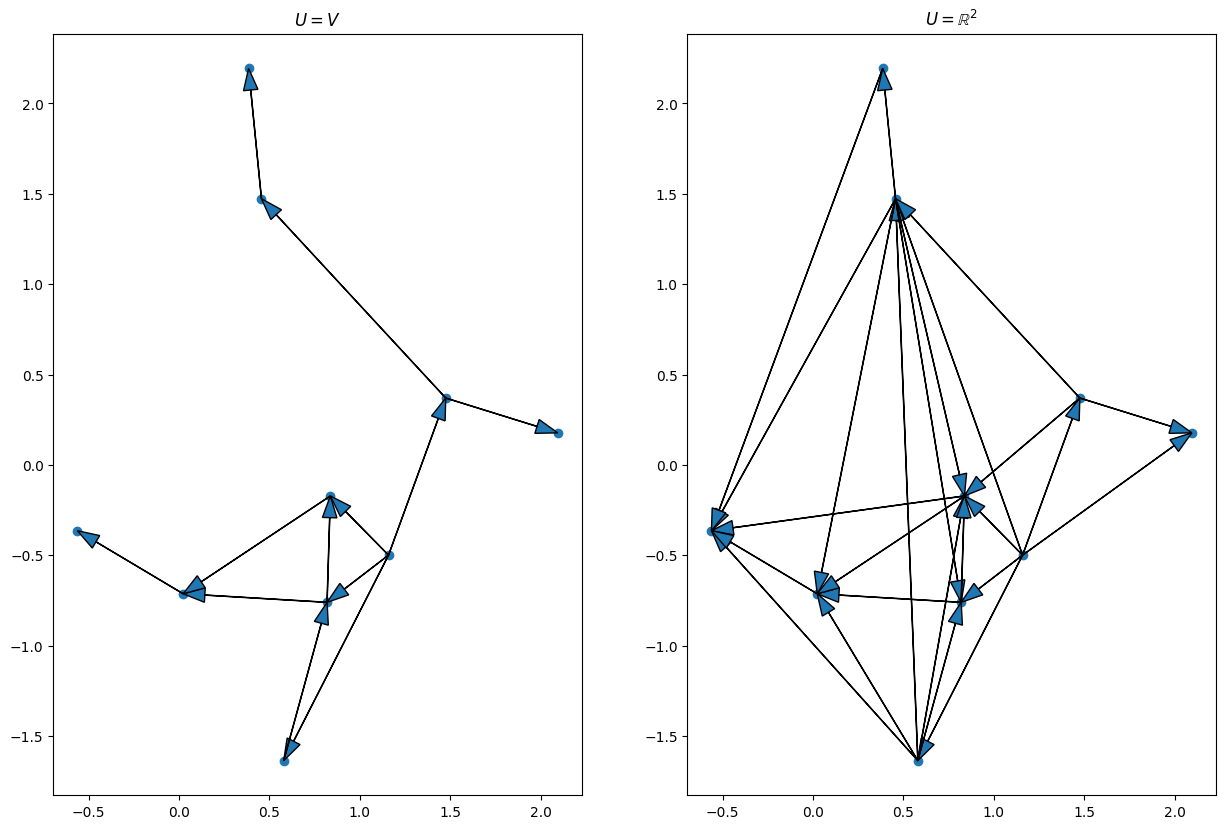

In [150]:
E_MSNET = sum([[(i, j) for j in G_MSNET[i]] for i in range(N)], [])
E_RDPTS = sum([[(i, j) for j in G_RDPTS[i]] for i in range(N)], [])

def PlotGraph(ax, X, Y, E, title):
    ax.scatter(X, Y)
    ax.set_title(title)
    ax.set_aspect('equal')
    for (i,j) in E:
        ax.arrow(X[i], Y[i], X[j]-X[i], Y[j]-Y[i], 
                  shape='full', head_width=.08,
                  length_includes_head=True)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15, 10)
PlotGraph(ax1, X, Y, E_MSNET, "$U = V$")
PlotGraph(ax2, X, Y, E_RDPTS, "$U = \\mathbb{R}^2$")
plt.show()

In [132]:
def SearchGraph(X, Y, G, x, y):
    i = 0
    D = (X-x)**2+(Y-y)**2
    while True:
        any = False
        for j in G[i]:
            assert j > i
            if D[j] < D[i]:
                i = j
                any = True
                break
        if not any: return i
def SearchLinear(X, Y, x, y):
    i = 0
    D = (X-x)**2+(Y-y)**2
    for j in range(len(X)):
        if D[j] < D[i]: i = j
    return i

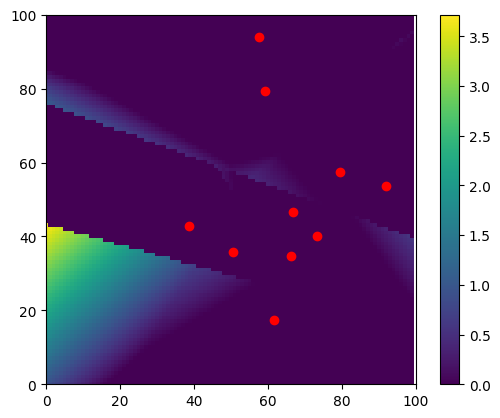

In [154]:
w = 100
X_test = np.linspace(-2.5, +2.5, w)
Y_test = np.linspace(-2.5, +2.5, w)
err_table = [[0]*w for _ in range(w)]
for i in range(w):
    for j in range(w):
        x, y= X_test[j], Y_test[i]
        aj = SearchLinear(X, Y, x, y)
        ap = SearchGraph(X, Y, G_MSNET, x, y)

        dj = ((X[aj]-x)**2 + (Y[aj]-y)**2)*.5
        dp = ((X[ap]-x)**2 + (Y[ap]-y)**2)*.5
        err_table[i][j] = dp - dj
plt.imshow(err_table, aspect='equal')
plt.colorbar()
plt.scatter((np.array(X)+2.5)/5*w, (np.array(Y)+2.5)/5*w, zorder=1, color='red')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()
